In [1]:
#Import all the dependencies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

In [110]:
#Initializing some of the hyperparameters
total_size = 1000
training_split = 0.8
training_size = total_size * training_split
training_size = int(training_size)
validation_size = total_size - training_size
minibatch = 100
alpha = 0.01 # Regularization constant
# Function to be learned 'fx'
fx = lambda x: np.sin(x) + np.random.normal(-0.1,0.1,x.shape) #Addiiton of noise so that the learning algorithm tries to extract the sense out of the noisy data

In [111]:
all_x = np.float32(
np.random.uniform(-2*math.pi, 2*math.pi, (1, total_size))).T#Transpose is necessary for matrix multiplications compatibility
np.random.shuffle(all_x)
train_x = all_x[:training_size].astype(np.float32)
valid_x = all_x[training_size:].astype(np.float32)
train_y = fx(train_x).astype(np.float32)
valid_y = fx(valid_x).astype(np.float32)
x = tf.placeholder(tf.float32,[None,1],name='x')
y = tf.placeholder(tf.float32,[None,1],name='y')

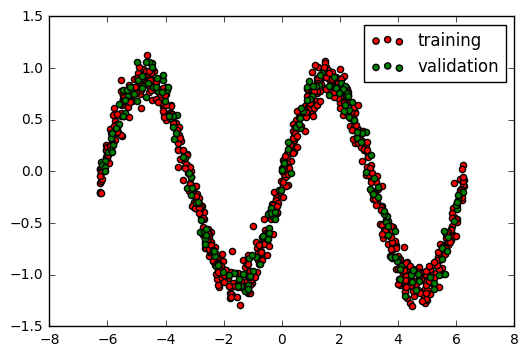

In [112]:
plt.figure(1)
plt.scatter(train_x,train_y,c = 'red', label = 'training')
plt.scatter(valid_x,valid_y, c= 'green', label = 'validation')
plt.legend()
plt.show()

In [113]:
def parameters(shape = [None,None] , initializer = 'xavier' , xavier_parameters = (None,None)):
    if initializer == 'zeroes':
        return tf.Variable(tf.zeros(shape=shape , dtype=tf.float32))
    else: # for xavier initialization
        fin,fout = xavier_parameters
        min_value = - np.sqrt(6.0 / (fin + fout))
        max_value = np.sqrt(6.0 / (fin + fout))
        return tf.Variable(tf.random_uniform(shape=shape , minval = min_value , maxval = max_value , dtype = tf.float32))

In [114]:
##Creating the model
# Consisting of 1 hidden layer
#w_0 represents weighs connecting the input and the first hidden layer
#b_0 represents biases of the neurons in the first hidden layer
#w_1 represents weights connecting the hidden layer and the output
#b_1 represents bias of the output neuron 
n_hidden = 50
def model(x , hidden):
    hidden = n_hidden
    w_0 = parameters([1,hidden] , 'xavier' , (1,hidden))
    b_0 = parameters([1,hidden] , 'zeroes')
    h = tf.nn.sigmoid(tf.matmul(x,w_0) + b_0)
    w_1 = parameters([hidden,1] , 'xavier' , (1,hidden))
    b_1 = parameters([1] , 'zeroes')
    return (tf.matmul(h,w_1) + b_1)

In [119]:
#The value predicted by our model
y_pred = model(x , n_hidden)
# Formulating the loss function
#loss = tf.reduce_mean(tf.nn.l2_loss(y_pred - y)) # + alpha*tf.nn.l2_loss(w_0) + alpha*tf.nn.l2_loss(w_1))
train_op = tf.train.AdamOptimizer().minimize(tf.nn.l2_loss(y_pred - y))

In [120]:
sess = tf.Session()

In [ ]:
sess.run(tf.global_variables_initializer())

In [ ]:
NUM_EPOCHS = 1000
# Mini batch gradient descent
errors = []
for i in range(NUM_EPOCHS):
    for start, end in zip(range(0, len(train_x), minibatch), range(minibatch, len(train_x), minibatch)):
        sess.run(train_op, feed_dict={x: train_x[start:end], y: train_y[start:end]})
    mse = sess.run(tf.nn.l2_loss(y_pred - valid_y),  feed_dict={x:valid_x})
    errors.append(mse)
    if i%100 == 0: 
        print("epoch %d, validation MSE %g" %(i,mse))
        plt.plot(errors)
        plt.xlabel('#epochs')
        plt.ylabel('MSE')
        plt.show()